In [17]:
import numpy as np
import scipy 
import astropy.units as u
import astropy.constants as const
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [18]:
#my values for star & planet:
M_star = 1.12 * u.Msun
M_p = 1.95 * u.Mjup
e = 0.28 #eccentricity
P = 7.44 * u.day #orbital period

#semi amplitude (from lecture slides): 
i = 90 * u.degree #inclination
K = ( M_p * np.sin(i.to('rad')) / (M_star+M_p)**(2/3) ) * (2*np.pi*const.G/P)**(1/3) * (1/np.sqrt(1-e**2))
#note this is using a_star, not the semi-major amplitude a

In [21]:
#############
##Functions##
#############

#try to use astropy units to guarantee agreement, need to convert back to floats for calculations (especially sin,cos)

def radial_velocity(omega,f):
    """
    Function to find the radial velocity from the argument of periastron, and the true anomaly. 
    The equation takes omega and f and returns radial velocity.
    Assuming i, P, e, and therefore semi-amplitude K are constant.
    """
    global K, e#, i, P, M_star, M_p
    
    V_r = K * (np.cos(omega + f) + e * np.cos(omega))
    return V_r.decompose()

def mean_anomaly(t):
    """
    Returns the mean anomaly M from an input of time.
    Uses the orbital period and choose the phase factor phi=0 as it will start the ?????.
    Input of t is in days.
    """
    global P 
    t = t.to(u.day) #takes the numpy array value and converts into a quantity object w/ units of days 
    M = 2*np.pi * (t/P) 
    return M*u.rad

def eccentric_anomaly(M):
    """
    Returns the eccentric anomaly E from an input of M.
    Has to be solved numerically using Newton-Rhapson method.
    """
    threshold = 1e-10 #the threshold error at which to stop the root finding algorithm
    E = 1 *u.m/u.m #initialise E as 1, convert to astropy quantity
#     its = 0 #removed iterations counter - very small iterations to even very low thresholds
    
    
    while True:
#         print(E.unit)
        E_n = E - (E - e * np.sin(E.value) - M.value) / (1 - e * np.cos(E.value)) #update E_n
        if np.abs(E - E_n) < threshold: #check if under threshold
#             print(its)
            break #once threshold has been reached: break
            
        else: 
            E = E_n #use E_n as E for next iteration
#             its+=1
    
    return E
    

def true_anomaly(E):
    """
    Returns the true anomaly f from an input of the eccentric anomaly.
    Derivation shown in handwritten notes.
    """
    
    f = 2*np.arctan( np.sqrt( (1 + e)/(1 - e) ) * np.tan(E.value/2) )
    return f 
    

In [22]:
#times and argument of periastrons

times = np.arange(0,2*P/u.day,0.01)*u.day
omegas = np.arange(0,2*np.pi,2*np.pi/5)

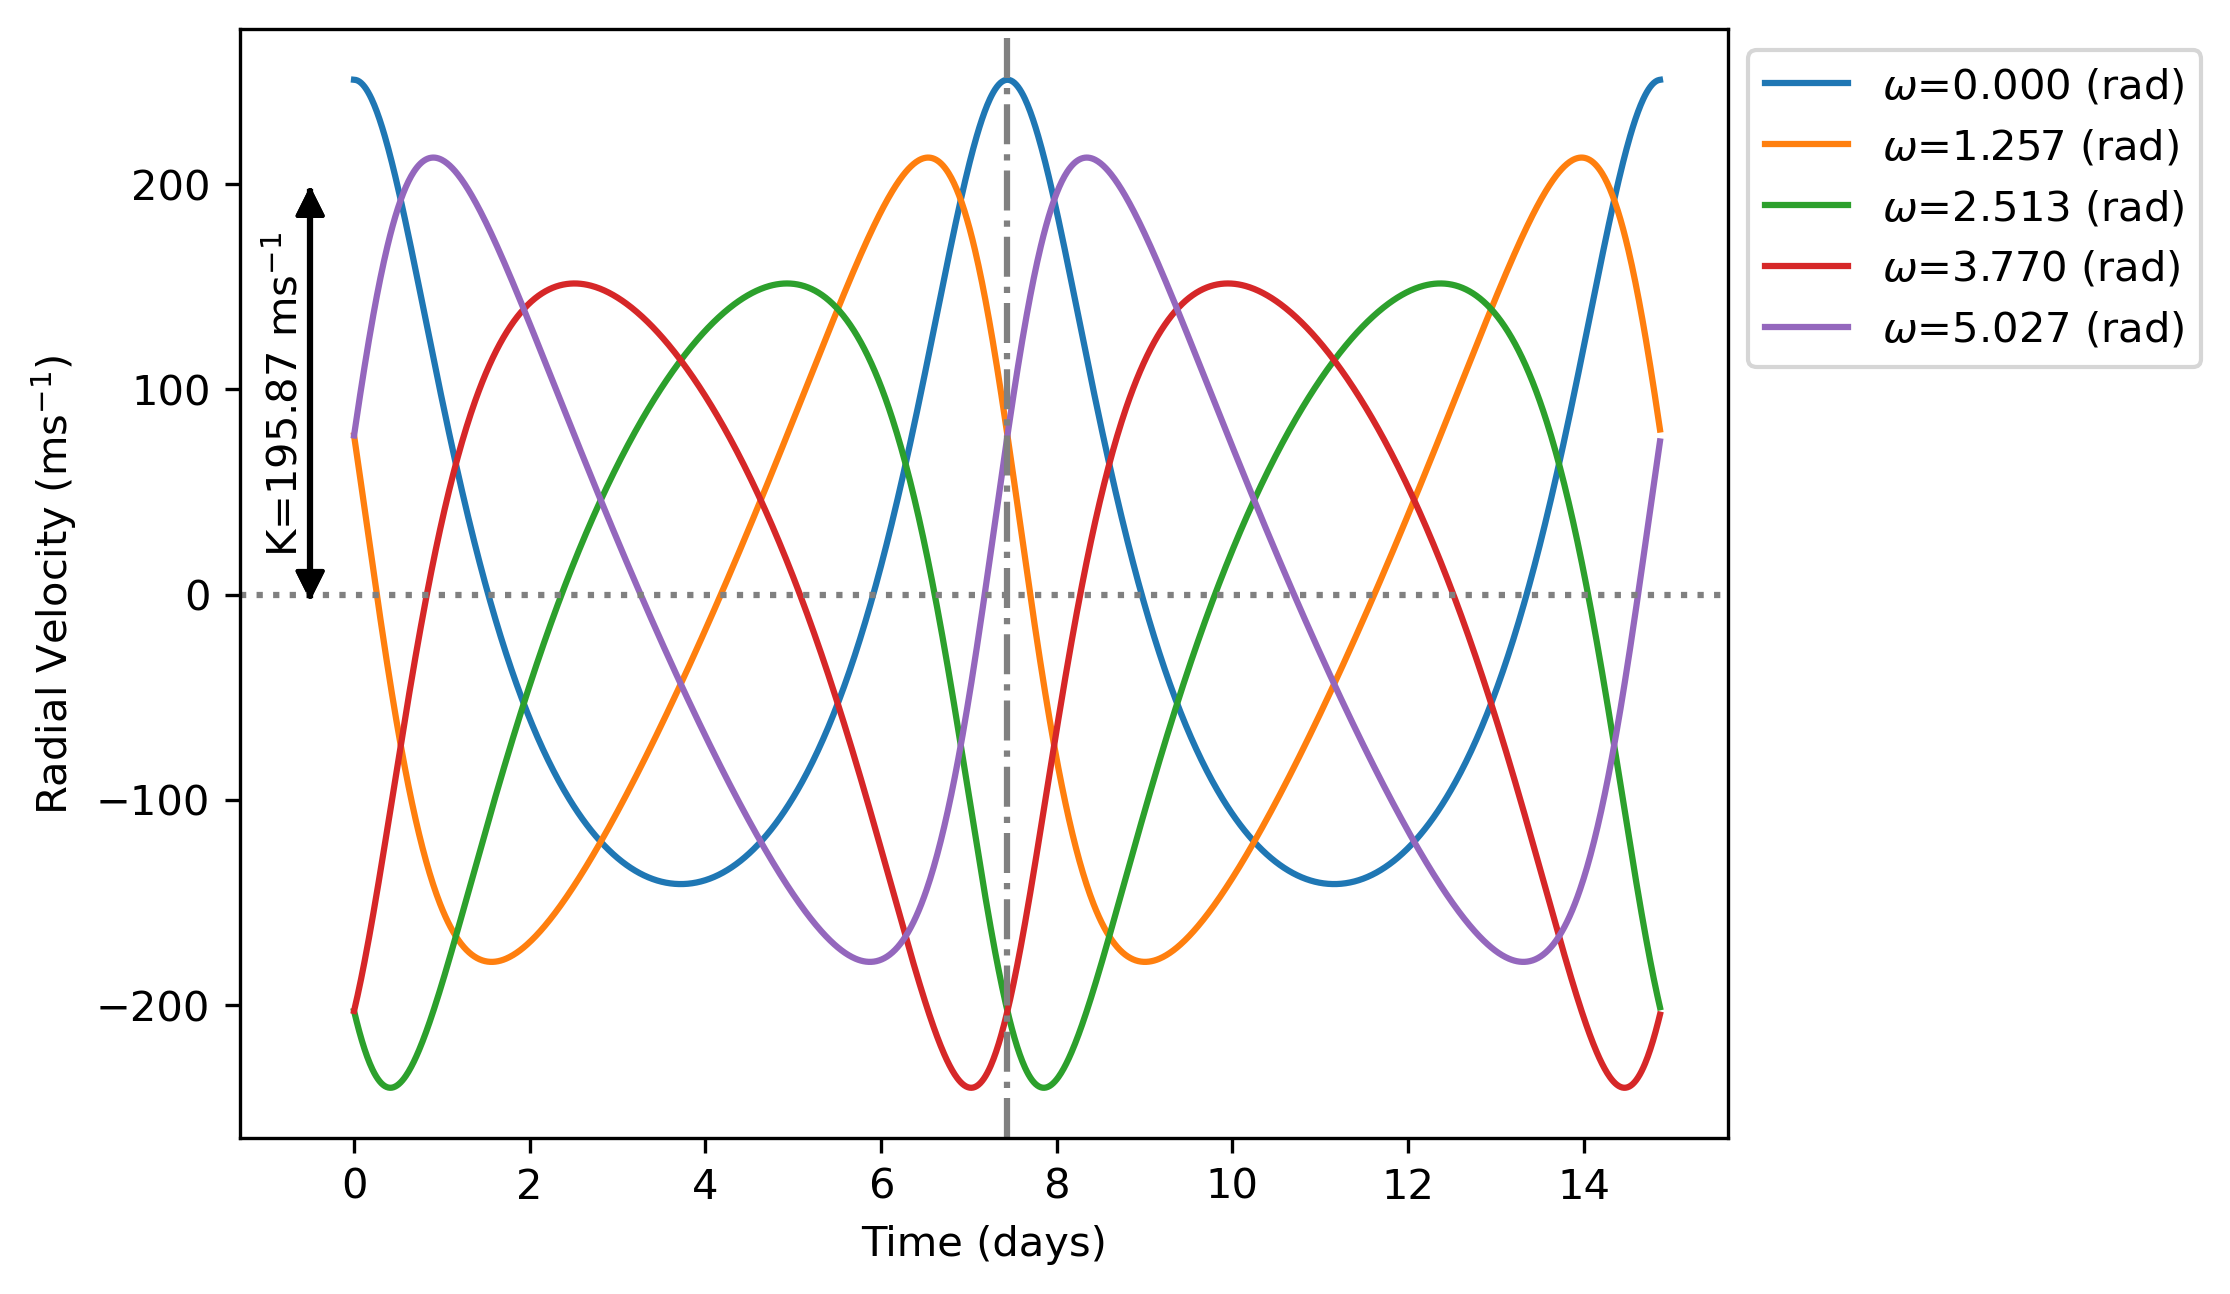

In [32]:
############
##Plotting##
############
# t = 0 chosen when V_r max with omega = 0


fig,ax = plt.subplots(dpi=300)

for omega in omegas:
    fs = [true_anomaly(eccentric_anomaly(mean_anomaly(t))) for t in times] #find true anomaly for each omega
    
    vels = [radial_velocity(omega,f).value for f in fs] #find v_r for each omega
    ax.plot(times,vels,label = r'$\omega$=' + f'{omega:.3f} (rad)')
#     print(np.argmax(vels))
    
plt.legend(loc='upper left',bbox_to_anchor=(1, 1))
ax.set_xlabel('Time (days)')
ax.set_ylabel(r'Radial Velocity (ms$^{-1})$')
ax.axvline(P.value, ls='-.',c='gray')
ax.axhline(0, ls=':',c='gray')

#show K on plot
ax.plot([-0.5,-0.5],[0,K.decompose().value],c='k')
arrow_start = patches.FancyArrowPatch((-0.5, 0), (-0.5, -3), arrowstyle='-|>', mutation_scale=15, color='black')
arrow_end = patches.FancyArrowPatch((-0.5, K.decompose().value), (-0.5, K.decompose().value +3), arrowstyle='-|>', mutation_scale=15, color='black')
ax.add_patch(arrow_start)
ax.add_patch(arrow_end)

#add arrows and text to K
ax.add_patch(arrow_start)
ax.add_patch(arrow_end)
ax.text(-1,23,'K=' +f'{K.decompose().value:.2f}'+r' ms$^{-1}$',rotation=90)    

plt.show()

array([0.  , 1.25, 2.5 , 3.75, 5.  , 6.25])

1.2566370614359172

Text(-0.5, 100, 'K$\\approx$195.87 ms$^{-1}$')

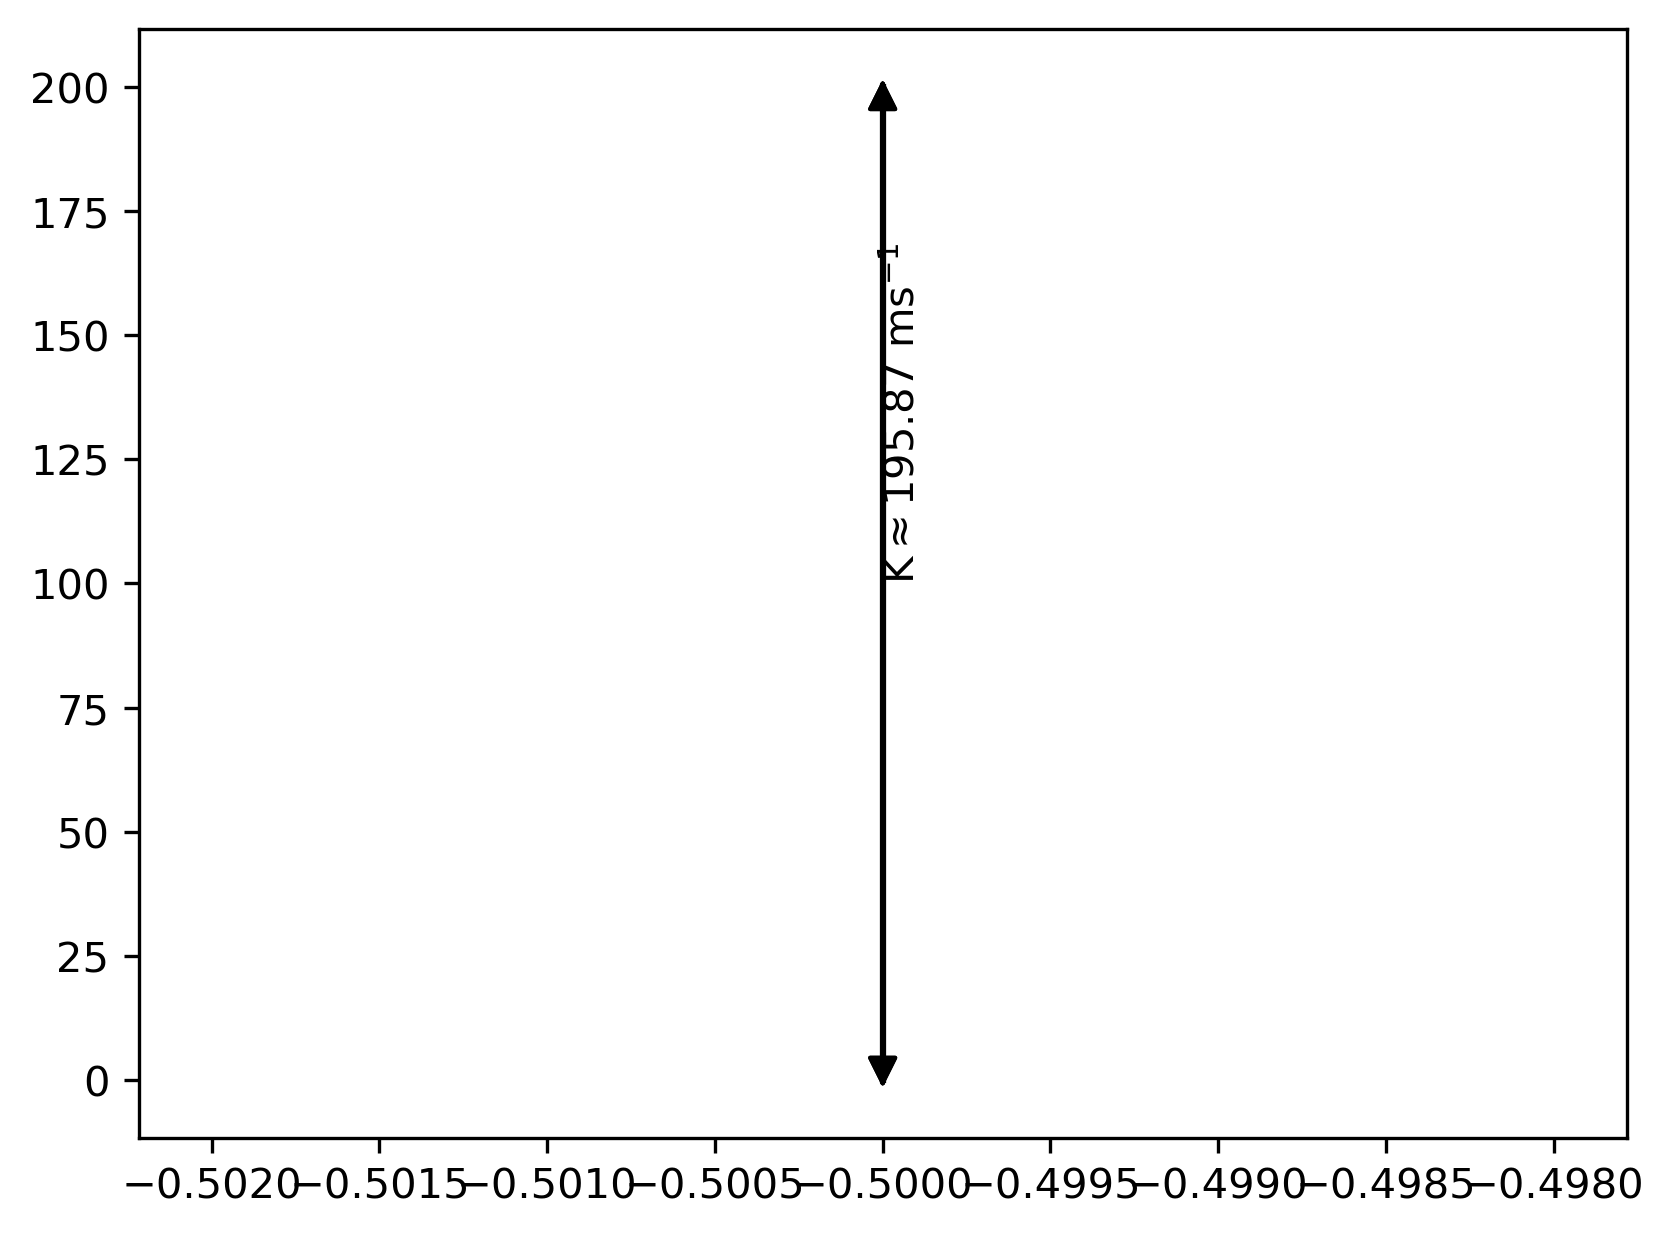

<Quantity 0.00072134 jupiterMass m / (d(1/3) kg(1/3) s(2/3) solMass(2/3))>